# AED sur le dataset des produits

Dans cette section, nous allons effectuer une analyse exploratoire des données (AED) sur le dataset `produits`. Cette analyse nous permettra de mieux comprendre la structure des données, de détecter les valeurs manquantes, de visualiser les distributions des variables et d'identifier les relations potentielles entre les variables.

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data = pd.read_csv('../RAW_data/produitsV2.csv', sep=";")
data.head()

,id_produit,catégorie,marque,prix,stock_minimum
0,P00001,Soins capillaires,Luxe eclat,467.42,52
1,P00002,Accessoires,Maison Pure,291.26,10
2,P00003,Maquillage,Essentielle Paris,354.39,60
3,P00004,Accessoires,Reflet d'or,462.80,33
4,P00005,Accessoires,Elixir Haute Beauté,359.47,33


In [50]:
data.shape

(1000, 5)

In [51]:
data.describe()

,prix,stock_minimum
count,1000.00000,1000.000000
mean,260.11725,53.404000
std,140.50500,25.583418
min,22.22000,10.000000
25%,133.13250,31.000000
50%,262.09000,54.000000
75%,377.61750,75.000000
max,499.72000,99.000000


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_produit     1000 non-null   object 
 1   catégorie      1000 non-null   object 
 2   marque         1000 non-null   object 
 3   prix           1000 non-null   float64
 4   stock_minimum  1000 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [53]:
data.isnull().sum()

id_produit       0
catégorie        0
marque           0
prix             0
stock_minimum    0
dtype: int64

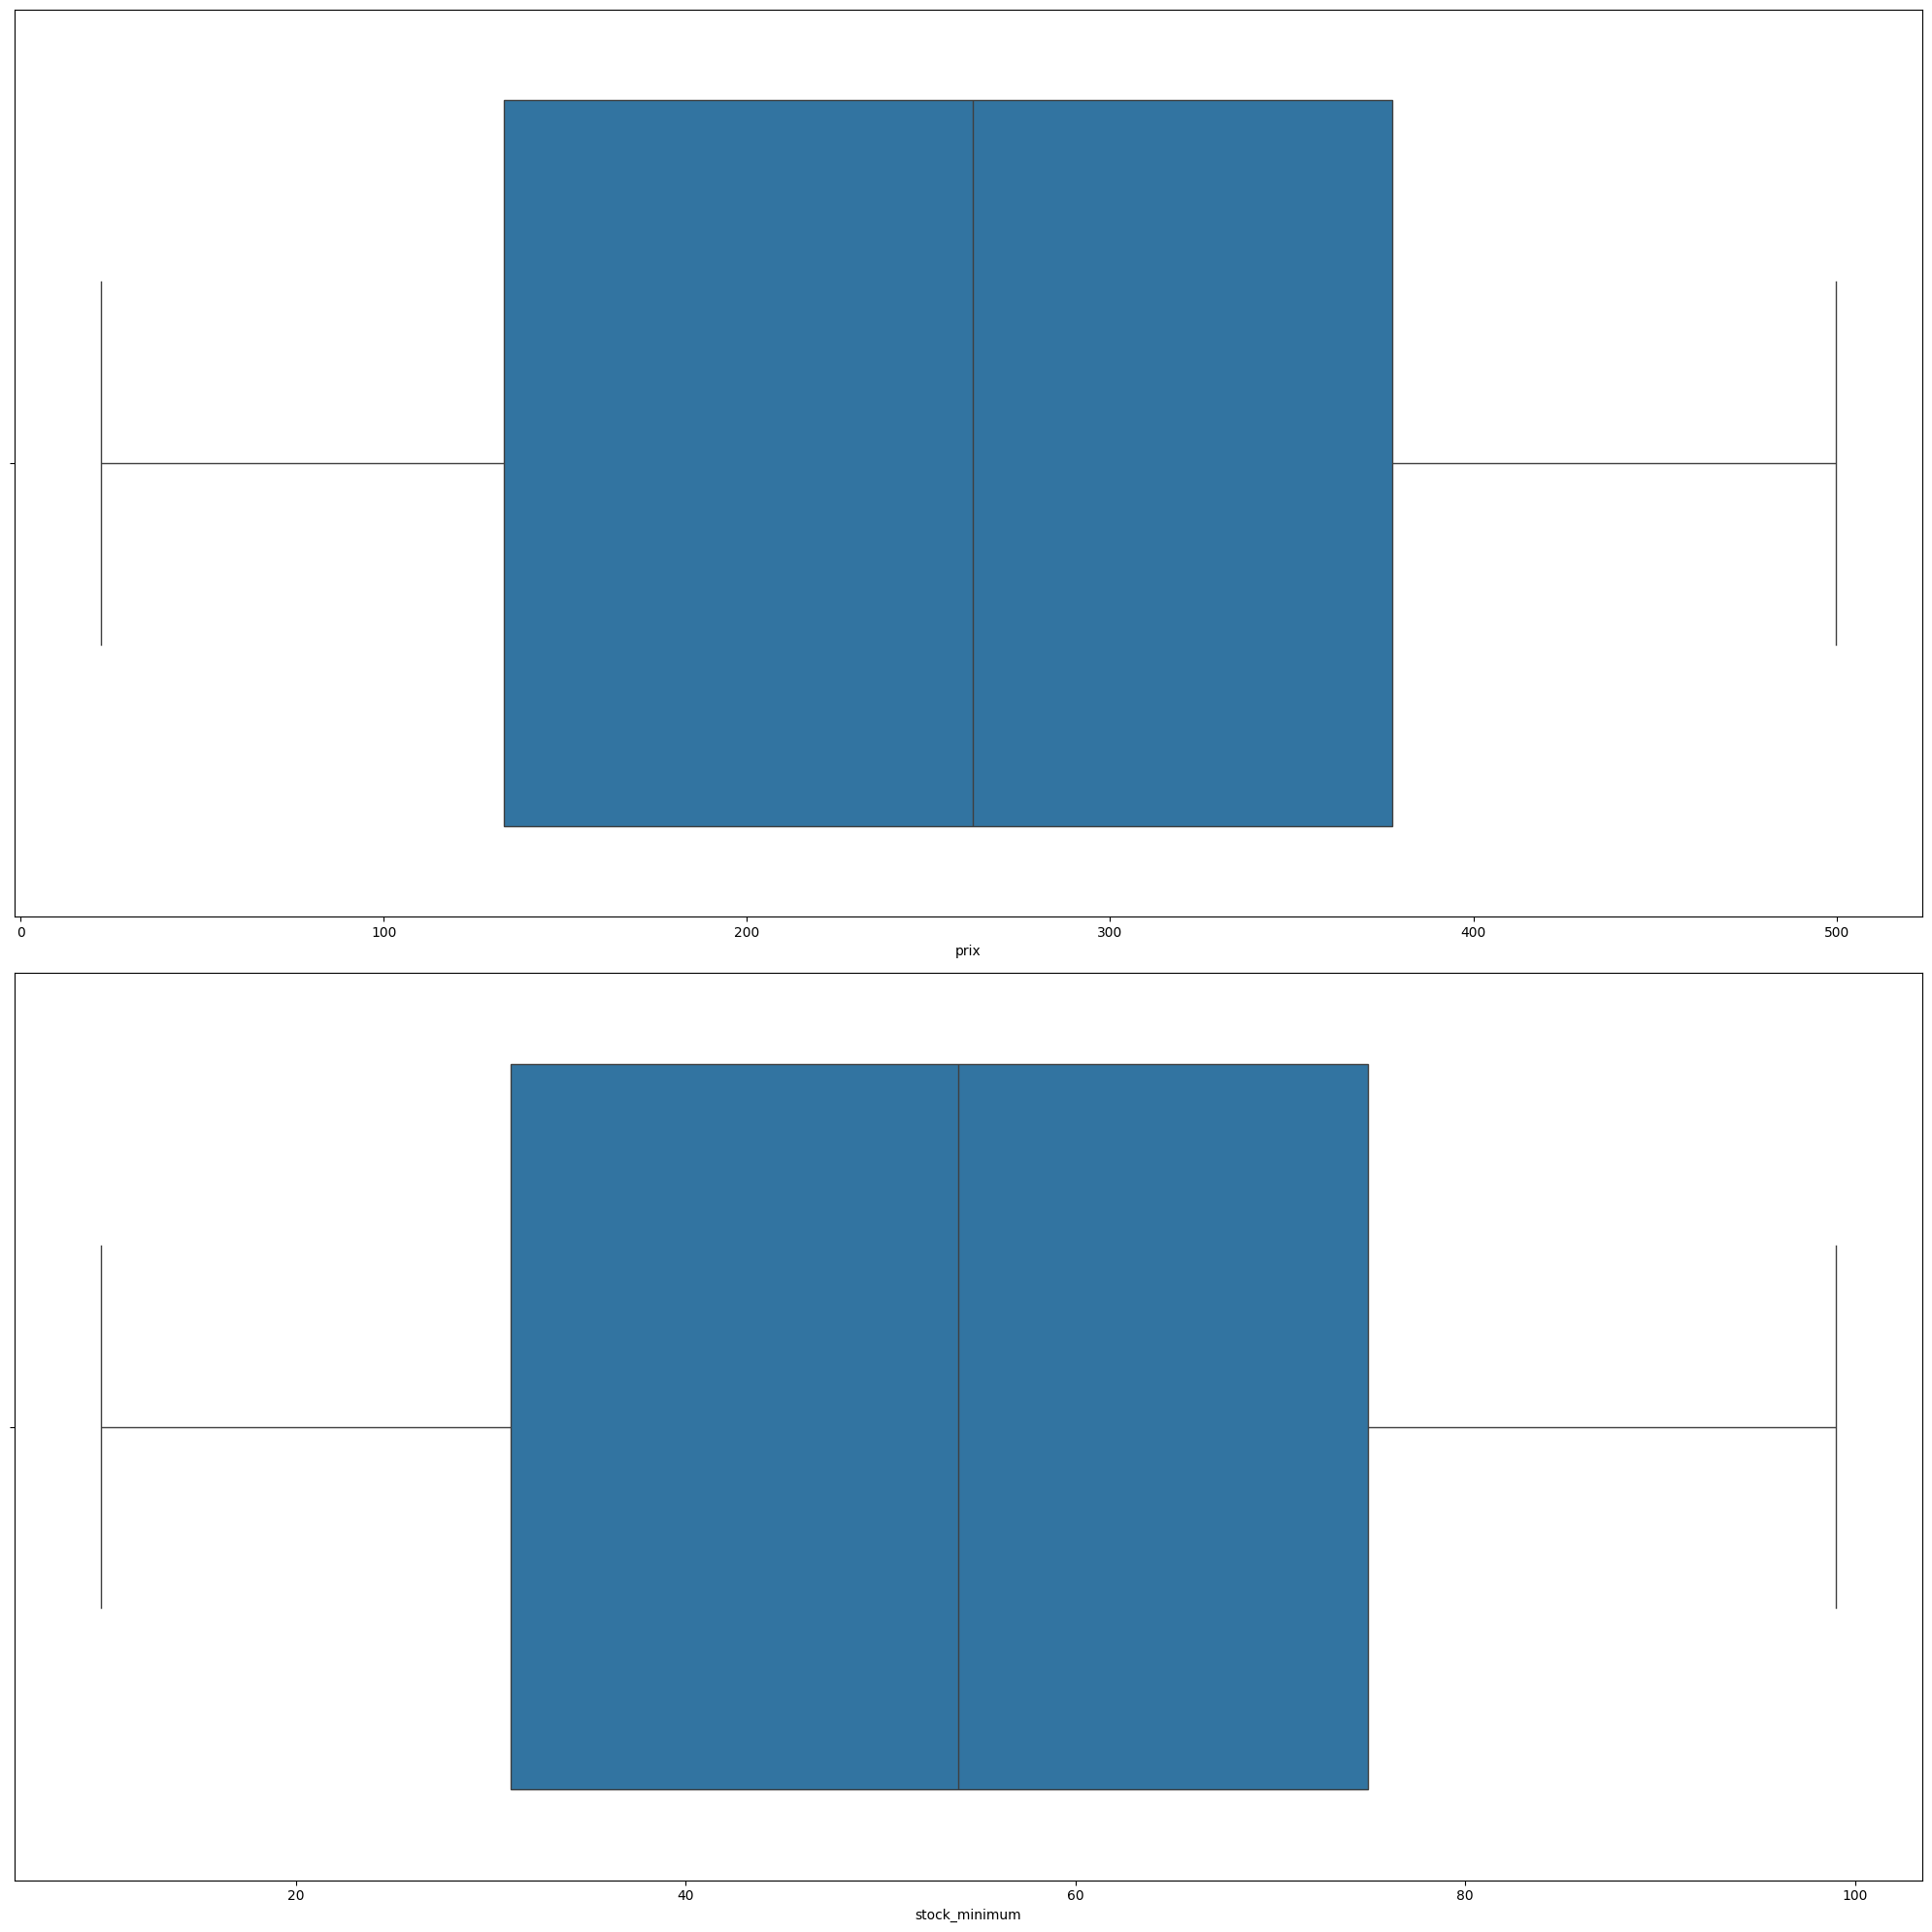

In [54]:
#on vient vérifier avec des boxplot si il y a des outliers (valeurs aberrantes)
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
sns.boxplot(x=data['prix'])
plt.subplot(2,1,2)
sns.boxplot(x=data['stock_minimum'])
plt.tight_layout()
plt.show()

Pas d'outliers sont présent dans ce dataset

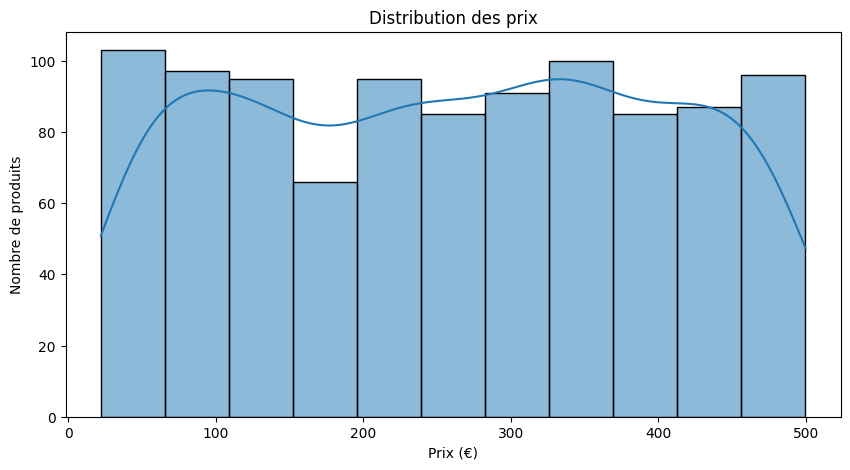

Prix minimum: 22.22€
Prix maximum: 499.72€
Prix moyen: 260.12€


In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='prix', stat='count', kde=True)
plt.title('Distribution des prix')
plt.xlabel('Prix (€)')
plt.ylabel('Nombre de produits')
plt.show()

print(f"Prix minimum: {data['prix'].min():.2f}€")
print(f"Prix maximum: {data['prix'].max():.2f}€")
print(f"Prix moyen: {data['prix'].mean():.2f}€")

<Axes: >

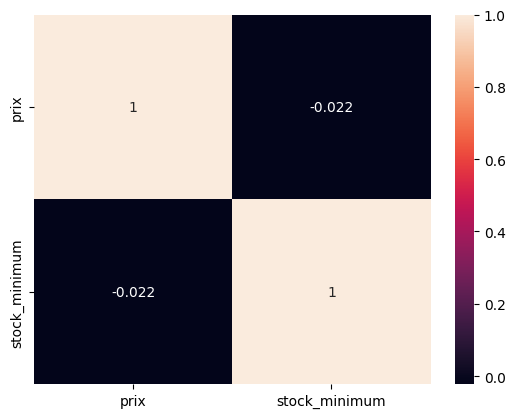

In [56]:
data_corr = data.drop(['prix', 'stock_minimum'], axis=1)

data_corr = data.select_dtypes(include=[np.number])
corr = data_corr.corr()
sns.heatmap(corr, annot=True)

Aucune corrélation.....

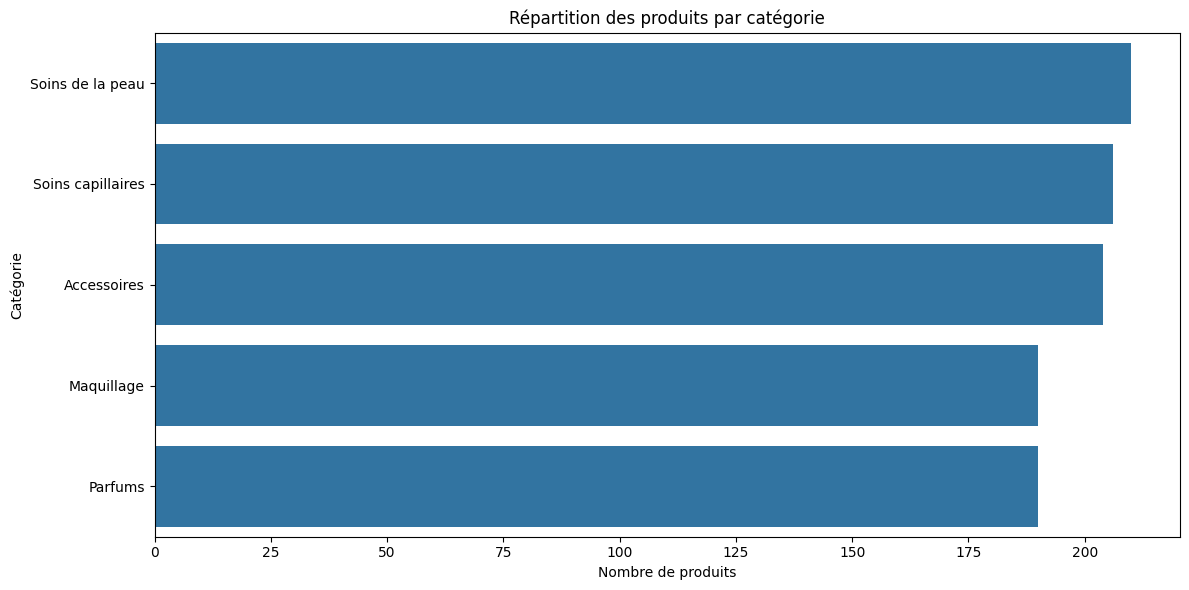

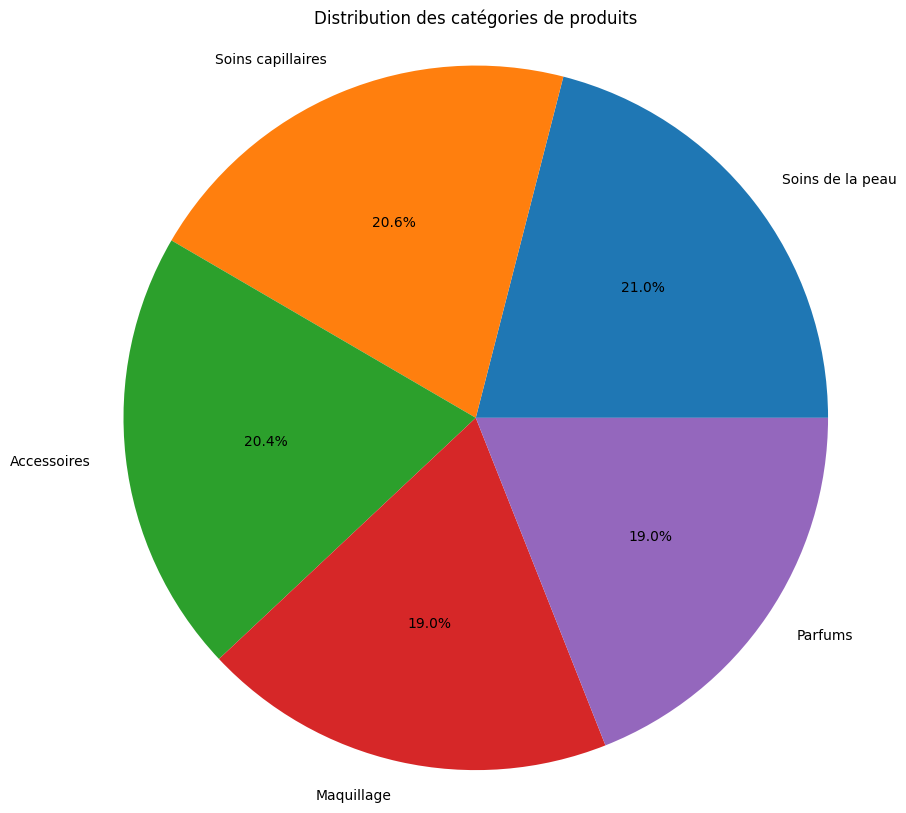

In [58]:
plt.figure(figsize=(12, 6))
category_counts = data['catégorie'].value_counts()
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title('Répartition des produits par catégorie')
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie')
plt.tight_layout()
plt.show()

# Ajout d'un camembert pour une vue proportionnelle
plt.figure(figsize=(10, 10))
plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution des catégories de produits')
plt.axis('equal')
plt.show()
